In [222]:
import pandas as pd
from pandas import Series
import glob
import plotly
import plotly.express as px  # import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
#pio.templates.default = 'plotly_white'

In [ ]:
def calc_corr(a,b):
    s1 = Series(a)
    s2 = Series(b)
    return round(s1.corr(s2), 3)

In [ ]:
# human tcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_tcr/human_tcr.csv")
df

In [ ]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["types"] = df["types"].astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRA"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRB"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Human_TCR"
df["index"] = df.index

In [ ]:
df

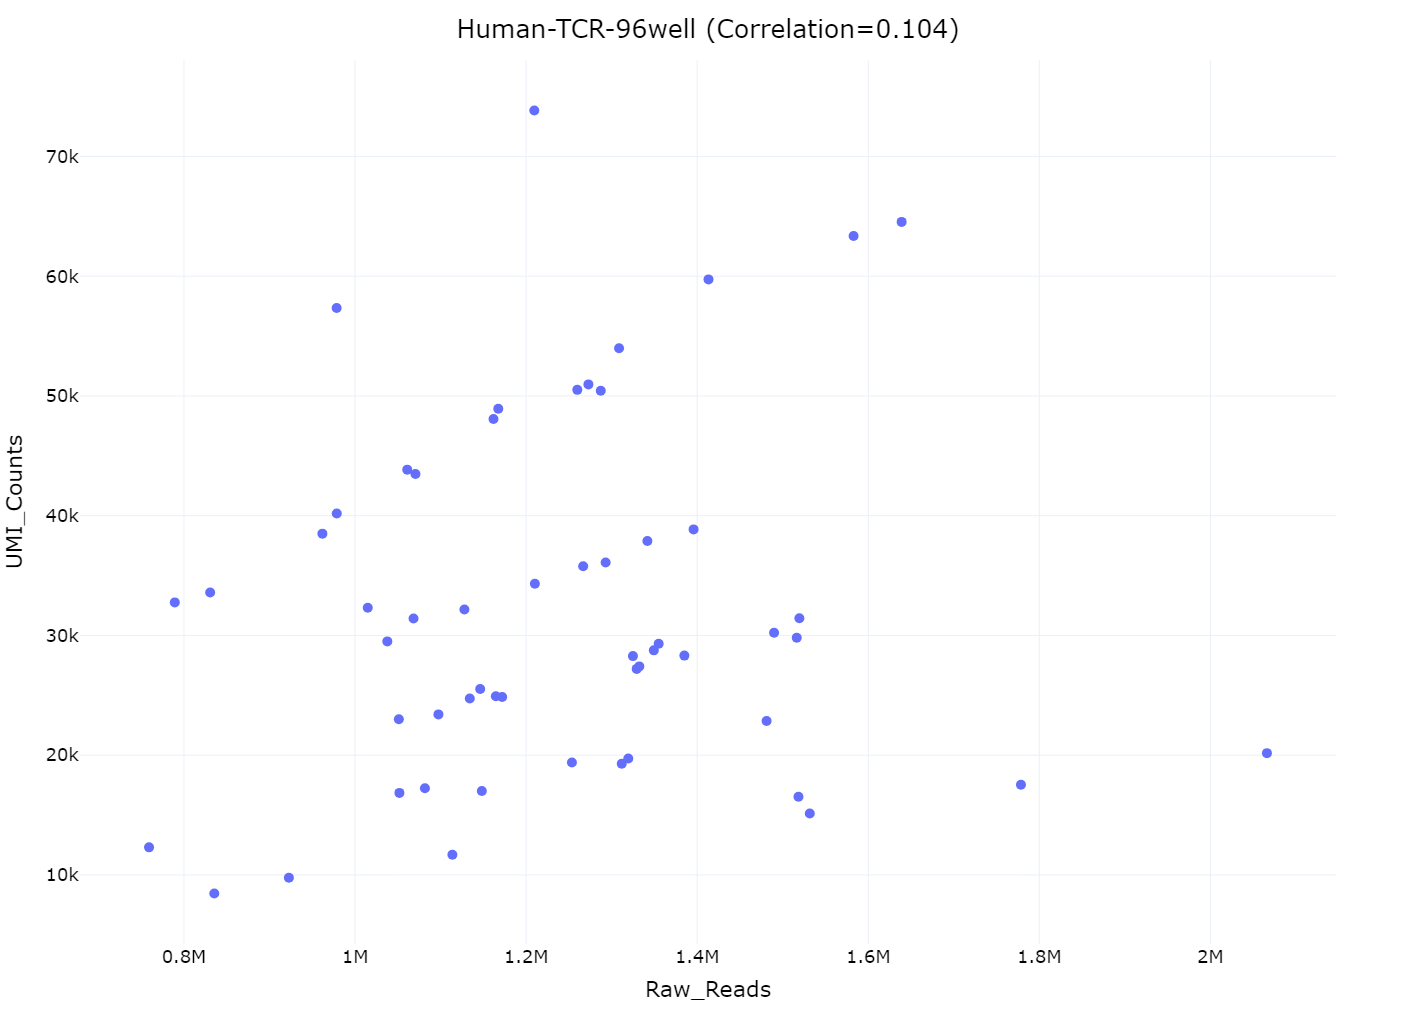

In [223]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024,
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Human-TCR-96well (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_tcr/scatter.png", scale=4)
#fig.show()

In [ ]:
df

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRA),name="UMIs_Mapped_To_TRA"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRB),name="UMIs_Mapped_To_TRB"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Human-TCR-96well',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_tcr/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Human-TCR-96well Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_tcr/diversity_read_scatter.png", scale=4)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Human-TCR-96well Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_tcr/diversity_umi_scatter.png", scale=4)
#fig.show()

In [ ]:
# human bcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_bcr/human_bcr.csv")
df

In [ ]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["types"] = df["types"].astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGH"] = df["UMIs_Mapped_To_IGH"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGL"] = df["UMIs_Mapped_To_IGL"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGK"] = df["UMIs_Mapped_To_IGK"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Human_BCR"
df["index"] = df.index

In [ ]:
df

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'UMI_Counts',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text": f'Human-BCR-96well (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))


fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_bcr/scatter.png", scale=4)
#fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGH),name="UMIs_Mapped_To_IGH"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGL),name="UMIs_Mapped_To_IGL"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGK),name="UMIs_Mapped_To_IGK"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Human-BCR-96well',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_bcr/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Human-BCR-96well Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_bcr/diversity_read_scatter.png", scale=4)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Human-BCR-96well Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/human_bcr/diversity_umi_scatter.png", scale=4)
#fig.show()

In [ ]:
# mouse_tcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_tcr/mouse_tcr.csv")
df

In [ ]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRA"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRB"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Mouse_TCR"
df["index"] = df.index

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'UMI_Counts',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-TCR-96well (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_tcr/scatter.png", scale=4)
#fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRA),name="UMIs_Mapped_To_TRA"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRB),name="UMIs_Mapped_To_TRB"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Mouse-TCR-96well',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_tcr/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-TCR-96well Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_tcr/diversity_read_scatter.png", scale=4)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-TCR-96well Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_tcr/diversity_umi_scatter.png", scale=4)
#fig.show()

In [ ]:
# human bcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_bcr/mouse_bcr.csv")
df

In [ ]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGH"] = df["UMIs_Mapped_To_IGH"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGL"] = df["UMIs_Mapped_To_IGL"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_IGK"] = df["UMIs_Mapped_To_IGK"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Human_BCR"
df["index"] = df.index

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'UMI_Counts',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-BCR-96well (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_bcr/scatter.png", scale=4)
#fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGH),name="UMIs_Mapped_To_IGH"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGL),name="UMIs_Mapped_To_IGL"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_IGK),name="UMIs_Mapped_To_IGK"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Mouse-BCR-96well',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_bcr/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-BCR-96well Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_bcr/diversity_read_scatter.png", scale=4)
#fig.show()

In [ ]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mouse-BCR-96well Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/mouse_bcr/diversity_umi_scatter.png", scale=4)
#fig.show()

In [ ]:
# 投入量测试 mouse-TCR

In [214]:
# mouse_tcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/mouse_tcr_cell.csv")
df = df.dropna(axis=0)

In [215]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].str.replace(',','').astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRA"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRB"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Mouse_TCR"
df["index"] = df.index

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [ ]:
df

In [216]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'UMI_Counts',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-spleenT (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/scatter.png", scale=4)
#fig.show()

In [217]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRA),name="UMIs_Mapped_To_TRA"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRB),name="UMIs_Mapped_To_TRB"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Mus-spleenT',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [218]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-spleenT Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/diversity_read_scatter.png", scale=4)
#fig.show()

In [219]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-spleenT Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/diversity_umi_scatter.png", scale=4)
#fig.show()

In [220]:
fig = px.box(df, y="Clonotype_Diversity", color="Sample")
fig.update_layout(title={"text":f'Mus-spleenT',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))
fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr/Diversity_boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [ ]:
# 投入量测试 rna mouse-TCR

In [201]:
# mouse_tcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/mouse_tcr_rna.csv")
df = df.dropna(axis=0)

In [203]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].str.replace(',','').astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRA"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRB"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "Mouse_TCR"
df["index"] = df.index

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [213]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'UMI_Counts',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-RNA (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "UMI_Counts", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/scatter.png", scale=4)
#fig.show()

In [212]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRA),name="UMIs_Mapped_To_TRA"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRB),name="UMIs_Mapped_To_TRB"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'Mus-RNA',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/boxplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [211]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-RNA Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Raw_Reads", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/diversity_read_scatter.png", scale=4)
#fig.show()

In [210]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Clonotype_Diversity',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Mus-RNA Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "UMI_Counts", yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/diversity_umi_scatter.png", scale=4)
#fig.show()

In [209]:
fig = px.box(df, y="Clonotype_Diversity", color="Sample")
fig.update_layout(title={"text":f'Mus-RNA',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Clonotype_Diversity", font=dict(size=18,color="Black"))
fig.write_image(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230704plot/cell_mouse_tcr_rna/Diversity_boxplot.png", scale=4, width=1680, height=1024)
#fig.show()